# Wildfire Summary Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfAB = pd.read_csv('data/ABWildfires_1961-2019.csv')

To answer Niko's question [(#5)](https://github.com/jasonrwang/AB-Wildfire/issues/5) re: measuring severity of fires instead of net area burned, let's take a look at the size of fires. 

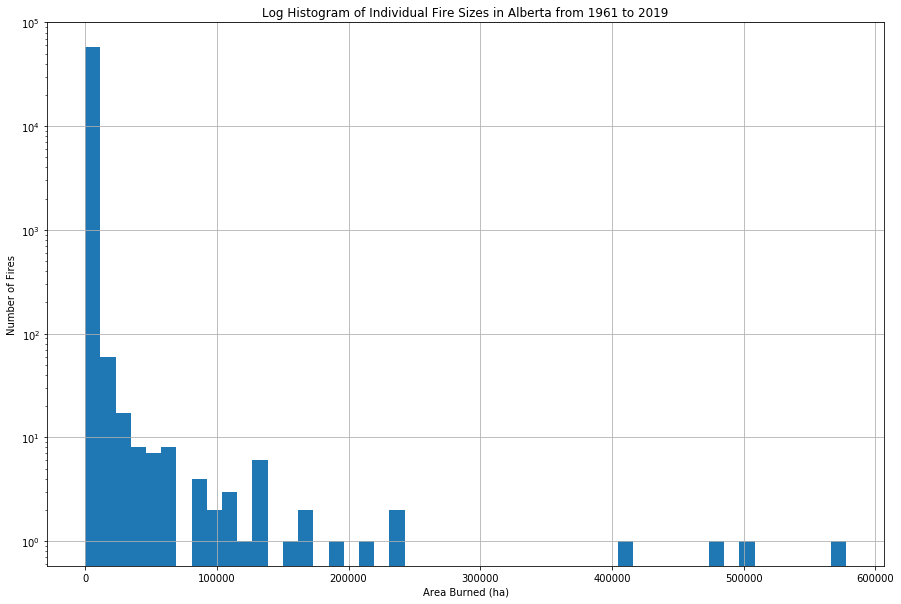

In [3]:
fig, ax = plt.subplots()

dfAB['Area'].hist(ax=ax, bins=50, bottom=0, figsize=(10,6.7))

ax.set(xlabel='Area Burned (ha)',
       ylabel='Number of Fires',
       title='Log Histogram of Individual Fire Sizes in Alberta from 1961 to 2019')

ax.set_yscale('log')
plt.savefig('img/loghistABWildfires_1961-2019.png')
plt.show()

## Alberta and British Columbia Aggregated

Let's show AB and BC combined in the time period that we have access to here. Some time in the future, it'd be nice to do this for all provinces.

In [4]:
dfBC = pd.read_csv('data/BCWildfires_1919-2019.csv')
dfBC['Area_BC_to1961'] = dfBC[ dfBC['Year'] < 1961 ]['Area']
dfBC['Area_BC_from1961'] = dfBC[ dfBC['Year'] >= 1961 ]['Area']

dfAB = dfAB.groupby(by = 'Year')['Area'].sum().reset_index() # BC is already aggregated by year

df = dfBC.merge(dfAB, how='outer', on='Year', suffixes=('_BC', '_AB'))

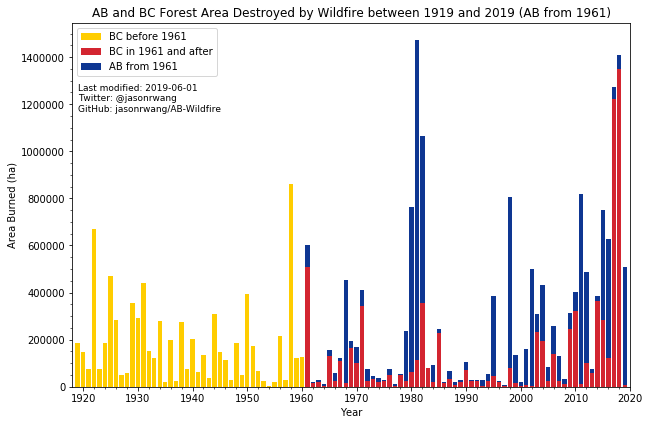

In [5]:
fig = plt.figure(figsize=((10,6.7)))

p1 = plt.bar(
    df['Year'].values, df['Area_BC_to1961'].values,
    color='#ffcd00', label='BC before 1961'
)
p2 = plt.bar(
    df['Year'].values, df['Area_BC_from1961'].values,
    color='#d32530', label='BC in 1961 and after'
)
p3 = plt.bar(
    df['Year'].values, df['Area_AB'].values,
    bottom=df['Area_BC'].values,
    color='#0e3692',label='AB from 1961'
)



plt.title('AB and BC Forest Area Destroyed by Wildfire between 1919 and 2019 (AB from 1961)')
plt.xlabel('Year')
plt.ylabel('Area Burned (ha)')
plt.legend(loc='upper left')

plt.xticks(range(1910, 2021, 10))
plt.xlim([1918, 2020])
plt.minorticks_on()

credit = 'Last modified: 2019-06-01\nTwitter: @jasonrwang\nGitHub: jasonrwang/AB-Wildfire'
plt.text(1919, 1170000, credit, fontsize=9)
# ax.text(1, 3, '2016 Fort\nMcMurray Fire', fontsize=10, horizontalalignment='center') # In case anyone has insights

# Save the the figure for other uses
plt.savefig('img/ABandBC_Wildfires_1919-2019.png')
plt.show()